In [25]:
import numpy as np

def calculate_end_point(length, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    x = length * np.cos(angle_radians)
    y = length * np.sin(angle_radians)
    z = 0  # Assuming vectors are in the xy-plane
    return x, y, z

# Given information
angle_degrees = 30  # Angle between vectors A and B
length_A = 10.0      # Length of vector A
length_B = 4.0      # Length of vector B

# Calculate end points of vectors A and B
end_point_A = calculate_end_point(length_A, angle_degrees)
start_point_B = end_point_A
end_point_B = calculate_end_point(length_B, angle_degrees)

print("End point of vector A:", end_point_A)
print("Start point of vector B:", start_point_B)
print("End point of vector B:", end_point_B)


End point of vector A: (8.660254037844387, 4.999999999999999, 0)
Start point of vector B: (8.660254037844387, 4.999999999999999, 0)
End point of vector B: (3.464101615137755, 1.9999999999999998, 0)


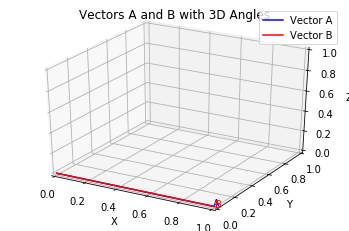

array([ 0.99973904,  0.01827431, -0.01370735])

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

def calculate_quaternion_rotation(angles_degrees):
    angle_x, angle_y, angle_z = np.radians(angles_degrees)
    rotation = R.from_euler('xyz', [angle_x, angle_y, angle_z], degrees=True)
    return rotation

# Given information
angles_degrees = (30, 45, 60)  # 3D angles (angle_x, angle_y, angle_z) between the lines

# Calculate quaternion rotation
quaternion_rotation = calculate_quaternion_rotation(angles_degrees)

# Define the endpoints of the lines
origin = np.array([0, 0, 0])
end_point_A = np.array([1, 0, 0])
end_point_B = quaternion_rotation.apply(end_point_A)

# Plot vectors and angles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot lines
ax.plot([origin[0], end_point_A[0]], [origin[1], end_point_A[1]], [origin[2], end_point_A[2]], color='blue', label='Vector A')
ax.plot([origin[0], end_point_B[0]], [origin[1], end_point_B[1]], [origin[2], end_point_B[2]], color='red', label='Vector B')

# Plot angles as arcs
ax.text(end_point_A[0], end_point_A[1], end_point_A[2], 'A', color='blue')
ax.text(end_point_B[0], end_point_B[1], end_point_B[2], 'B', color='red')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vectors A and B with 3D Angles')

ax.legend()

plt.show()
end_point_B

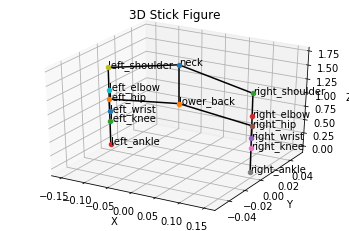

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_joint_positions(joint_angles):
    # Define joint positions
    joint_positions = {
        'neck': (0, 0, 1.69),     # Approximate height of head from ground
        
         # Lower back (around L4/L5)
        'lower_back': (0, 0, 1.0),              # Estimated lower back position

        # Right side
        'right_shoulder': (0.15, 0, 1.42),   # Estimated right shoulder position
        'right_elbow': (0.15, 0, 1.02),      # Estimated right elbow position
        'right_wrist': (0.15, 0, 0.62),      # Estimated right wrist position
        'right_hip': (0.15, 0, 0.845),         # Estimated right hip position
        'right_knee': (0.15, 0, 0.44),         # Estimated right knee position
        'right_ankle': (0.15, 0, 0),            # Approximate right ankle position

        # Left side
        'left_shoulder': (-0.15, 0, 1.42),   # Estimated left shoulder position
        'left_elbow': (-0.15, 0, 1.02),      # Estimated left elbow position
        'left_wrist': (-0.15, 0, 0.62),      # Estimated left wrist position
        'left_hip': (-0.15, 0, 0.845),         # Estimated left hip position
        'left_knee': (-0.15, 0, 0.44),         # Estimated left knee position
        'left_ankle': (-0.15, 0, 0)             # Approximate left ankle position
    }

    # Convert degrees to radians
    joint_angles_radians = {joint: np.radians(angles) for joint, angles in joint_angles.items()}

    # Calculate joint positions
    for joint, angles in joint_angles_radians.items():
        rotation_matrix = np.array([
            [np.cos(angles[2]), -np.sin(angles[2]), 0],
            [np.sin(angles[2]), np.cos(angles[2]), 0],
            [0, 0, 1]
        ])
        position = np.dot(rotation_matrix, joint_positions[joint])
        joint_positions[joint] = position

    return joint_positions

# Example joint angles in degrees
joint_angles_degrees = {
    'neck': [0, 0, 0],
    'right_shoulder': [45, 0, 0],
    'right_elbow': [90, 0, 0],
    'right_wrist': [0, 0, 0],
    'right_hip': [-30, 0, 0],
    'right_knee': [60, 0, 0],
    'right_ankle': [-30, 0, 0],
    'left_shoulder': [45, 0, 0],
    'left_elbow': [90, 0, 0],
    'left_wrist': [0, 0, 0],
    'left_hip': [-30, 0, 0],
    'left_knee': [60, 0, 0],
    'left_ankle': [-30, 0, 0]
}

joint_positions = calculate_joint_positions(joint_angles_degrees)

# Plot stick figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for joint, position in joint_positions.items():
    ax.scatter(*position, marker='o')
    ax.text(*position, joint)
    
# Connect joints with lines
joint_connections = [
    ('neck', 'left_shoulder'),
    ('left_shoulder', 'left_elbow'),
    ('left_elbow', 'left_wrist'),
    ('neck', 'right_shoulder'),
    ('right_shoulder', 'right_elbow'),
    ('right_elbow', 'right_wrist'),
    ('neck', 'lower_back'),
    ('lower_back','left_hip'),
    ('left_hip', 'left_knee'),
    ('left_knee', 'left_ankle'),
    ('lower_back','right_hip'),
    ('right_hip', 'right_knee'),
    ('right_knee', 'right_ankle')
]

for start_joint, end_joint in joint_connections:
    start_position = joint_positions[start_joint]
    end_position = joint_positions[end_joint]
    ax.plot([start_position[0], end_position[0]],
            [start_position[1], end_position[1]],
            [start_position[2], end_position[2]], color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Stick Figure')

plt.show()


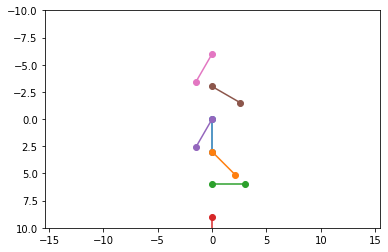

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Joint angles (example values)
joint_angles = {
    'neck': 0,
    'shoulder': 45,
    'elbow': 90,
    'wrist': 0,
    'hip': -30,
    'knee': 60,
    'ankle': -30
}

def plot_stick_figure(joint_angles):
    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

    # Define joint positions
    joints = {
        'neck': [0, 0],
        'shoulder': [0, 3],
        'elbow': [0, 6],
        'wrist': [0, 9],
        'hip': [0, 0],
        'knee': [0, -3],
        'ankle': [0, -6]
    }

    # Draw stick figure
    for joint, angle in joint_angles.items():
        x, y = joints[joint]
        length = 3
        dx = length * np.sin(np.radians(angle))
        dy = length * np.cos(np.radians(angle))
        ax.plot([x, x + dx], [y, y + dy], marker='o')

    plt.gca().invert_yaxis()
    plt.show()

plot_stick_figure(joint_angles)


In [2]:
import pygame
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLUT import *
import numpy as np

# Initialize Pygame
pygame.init()
display = (800, 600)
pygame.display.set_mode(display, DOUBLEBUF | OPENGL)
glMatrixMode(GL_PROJECTION)
gluPerspective(45, (display[0] / display[1]), 0.1, 50.0)
glMatrixMode(GL_MODELVIEW)
gluLookAt(0, -30, 10, 0, 0, 0, 0, 0, 1)

# Joint angles (example values)
joint_angles = {
    'neck': [0, 0, 0],
    'shoulder': [45, 0, 0],
    'elbow': [90, 0, 0],
    'wrist': [0, 0, 0],
    'hip': [-30, 0, 0],
    'knee': [60, 0, 0],
    'ankle': [-30, 0, 0]
}

def draw_cylinder(radius, height):
    quadric = gluNewQuadric()
    gluCylinder(quadric, radius, radius, height, 20, 20)

def draw_joint(radius):
    glutSolidSphere(radius, 20, 20)

def stick_figure():
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    glPushMatrix()

    # Draw stick figure
    glTranslatef(0, 0, 0)
    draw_joint(0.5)  # Draw neck

    # Draw body parts
    for joint, angles in joint_angles.items():
        glRotatef(angles[0], 1, 0, 0)
        glRotatef(angles[1], 0, 1, 0)
        glRotatef(angles[2], 0, 0, 1)
        if joint != 'neck':
            draw_cylinder(0.2, 1)  # Draw limb

    glPopMatrix()
    pygame.display.flip()

def main():
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        stick_figure()
        pygame.time.wait(10)

if __name__ == "__main__":
    main()


NameError: name 'gluPerspective' is not defined